In [1]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi
video_id = 'S4lTtvlFvyk'
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [3]:
df = pd.DataFrame(transcript)

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [5]:
corpus = df['text'].tolist()

encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
max_len = max([len(text) for text in encoded_corpus])

padded_corpus = [np.pad(encoded_text, (0, max_len - len(encoded_text)), 'constant') for encoded_text in encoded_corpus]
padded_corpus = torch.tensor(padded_corpus)

/var/folders/2_/dkxg0fq56mv06fxh6723qjn00000gn/T/ipykernel_18653/1113232145.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525699189/work/torch/csrc/utils/tensor_new.cpp:233.)
  padded_corpus = torch.tensor(padded_corpus)


In [6]:
with torch.no_grad():
    outputs = model(padded_corpus)



In [7]:
from transformers import pipeline

SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                      ])

[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944382905960083}]

In [9]:
def FunctionBERTSentiment(inpText):
    return(SentimentClassifier(inpText)[0]['label'])

FunctionBERTSentiment(inpText="Houston we are fucked")

'NEGATIVE'

In [10]:
df['Sentiment'] = df['text'].apply(FunctionBERTSentiment)
df.head(10)

,text,start,duration,Sentiment
0,Point number one: When you hear someone longin...,13.250,8.430,POSITIVE
1,a grain of salt.,21.680,5.180,POSITIVE
2,Take it with a grain of salt.,26.860,4.240,POSITIVE
3,We live in a great nation and we are rightly\n...,31.100,4.940,POSITIVE
4,We are beneficiaries of the labor and the\ngri...,36.040,4.650,POSITIVE
5,before.,40.690,2.829,NEGATIVE
6,"But I guess it’s part of human nature, especia...",43.519,5.130,POSITIVE
7,to look backwards and long for some imaginary\...,48.649,7.881,NEGATIVE
8,"hummed, and all politicians were wise, and\nev...",56.530,6.631,POSITIVE
9,pretty much did whatever it wanted around\nthe...,63.161,4.289,POSITIVE


<Axes: >

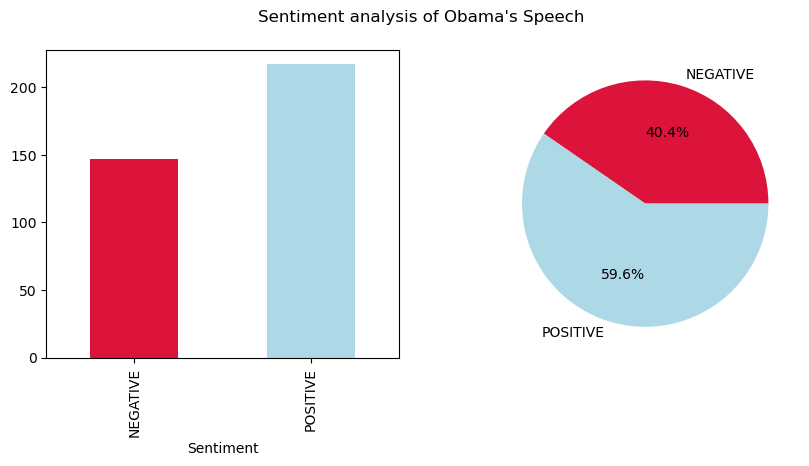

In [12]:
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Obama's Speech")
 
# Grouping the data
GroupedData=df.groupby('Sentiment').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'], autopct='%1.1f%%')